<a href="https://colab.research.google.com/github/nehafarath/course-recommendation/blob/main/Course_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [ ]:
data = pd.read_csv("/Coursera.csv")
data.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [ ]:
data.shape 

(3522, 7)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [ ]:
data.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [ ]:
label=data['Difficulty Level'].value_counts().index
count=data['Difficulty Level'].value_counts().values

Visualizing Dataset

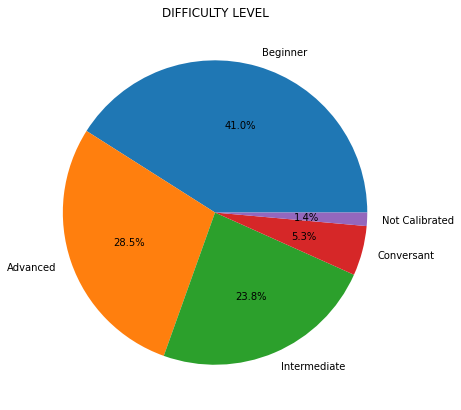

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.title("DIFFICULTY LEVEL")
plt.pie(count, labels=label,autopct='%1.1f%%')
plt.show()

In [ ]:
data['Difficulty Level'].value_counts()

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

In [ ]:
label=data['Course Rating'].value_counts().index
count=data['Course Rating'].value_counts().values

<BarContainer object of 10 artists>

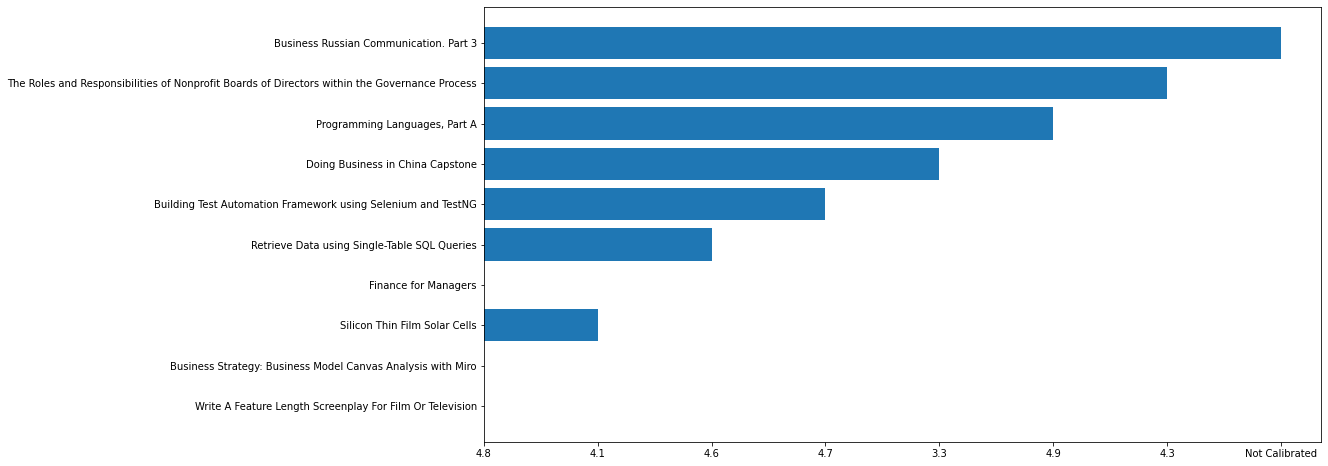

In [ ]:
Y = data['Course Rating'].head(10)
X = data['Course Name'].head(10)
 
# Figure Size
fig, ax = plt.subplots(figsize =(15,8))
 
# Horizontal Bar Plot
ax.barh(X,Y)

In [ ]:
data['Course Rating'].value_counts()


4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [ ]:
data['University'].value_counts()

Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Michigan                        101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: University, Length: 184, dtype: int64

In [ ]:
data['Course Name']


0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy: Business Model Canvas Analy...
2                           Silicon Thin Film Solar Cells
3                                    Finance for Managers
4            Retrieve Data using Single-Table SQL Queries
                              ...                        
3517    Capstone: Retrieving, Processing, and Visualiz...
3518                     Patrick Henry: Forgotten Founder
3519    Business intelligence and data analytics: Gene...
3520                                  Rigid Body Dynamics
3521    Architecting with Google Kubernetes Engine: Pr...
Name: Course Name, Length: 3522, dtype: object

In [ ]:
data.head(5)


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


Removing spaces between the words

In [ ]:


data['Course Name'] = data['Course Name'].str.replace(' ',',')
data['Course Name'] = data['Course Name'].str.replace(',,',',')
data['Course Name'] = data['Course Name'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace(' ',',')
data['Course Description'] = data['Course Description'].str.replace(',,',',')
data['Course Description'] = data['Course Description'].str.replace('_','')
data['Course Description'] = data['Course Description'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace('(','')
data['Course Description'] = data['Course Description'].str.replace(')','')



#removing paranthesis from skills columns 
data['Skills'] = data['Skills'].str.replace('(','')
data['Skills'] = data['Skills'].str.replace(')','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.p

In [ ]:
data.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...
1,"Business,Strategy,Business,Model,Canvas,Analys...",Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...
2,"Silicon,Thin,Film,Solar,Cells",�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...
3,"Finance,for,Managers",IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...


In [ ]:
data['tags'] = data['Course Name'] + data['Difficulty Level'] + data['Course Description'] + data['Skills']

In [ ]:
data.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...,"Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...",Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...,"Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells",�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...,"Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers",IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...,"Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...,"Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [ ]:
data['tags'].iloc[1]


'Business,Strategy,Business,Model,Canvas,Analysis,with,MiroBeginnerBy,the,end,of,this,guided,project,you,will,be,fluent,in,identifying,and,creating,Business,Model,Canvas,solutions,based,on,previous,high-level,analyses,and,research,data.,This,will,enable,you,to,identify,and,map,the,elements,required,for,new,products,and,services.,Furthermore,it,is,essential,for,generating,positive,results,for,your,business,venture.,This,guided,project,is,designed,to,engage,and,harness,your,visionary,and,exploratory,abilities.,You,will,use,proven,models,in,strategy,and,product,development,with,the,Miro,platform,to,explore,and,analyse,your,business,propositions.,,We,will,practice,critically,examining,results,from,previous,analysis,and,research,results,in,deriving,the,values,for,each,of,the,business,model,sections.Finance  business plan  persona user experience  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy'

Creating New Dataframe

In [ ]:
new_df = data[['Course Name','tags']]

In [ ]:
n_d=data[['Course Name','Course URL','Difficulty Level','Course Rating']]

In [ ]:
n_d.head(10)

,Course Name,Course URL,Difficulty Level,Course Rating
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",https://www.coursera.org/learn/write-a-feature...,Beginner,4.8
1,"Business,Strategy,Business,Model,Canvas,Analys...",https://www.coursera.org/learn/canvas-analysis...,Beginner,4.8
2,"Silicon,Thin,Film,Solar,Cells",https://www.coursera.org/learn/silicon-thin-fi...,Advanced,4.1
3,"Finance,for,Managers",https://www.coursera.org/learn/operational-fin...,Intermediate,4.8
4,"Retrieve,Data,using,Single-Table,SQL,Queries",https://www.coursera.org/learn/single-table-sq...,Beginner,4.6
5,"Building,Test,Automation,Framework,using,Selen...",https://www.coursera.org/learn/building-test-a...,Beginner,4.7
6,"Doing,Business,in,China,Capstone",https://www.coursera.org/learn/doing-business-...,Advanced,3.3
7,"Programming,Languages,Part,A",https://www.coursera.org/learn/programming-lan...,Intermediate,4.9
8,"The,Roles,and,Responsibilities,of,Nonprofit,Bo...",https://www.coursera.org/learn/nonprofit-gov-2,Intermediate,4.3
9,"Business,Russian,Communication.,Part,3",https://www.coursera.org/learn/business-russia...,Intermediate,Not Calibrated


In [ ]:
new_df.head(5)


,Course Name,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...","Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...","Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells","Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers","Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries","Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [ ]:
n_d['Course Name'] = data['Course Name'].str.replace(',',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
n_d.head(10)

,Course Name,Course URL,Difficulty Level,Course Rating
0,Write A Feature Length Screenplay For Film Or ...,https://www.coursera.org/learn/write-a-feature...,Beginner,4.8
1,Business Strategy Business Model Canvas Analys...,https://www.coursera.org/learn/canvas-analysis...,Beginner,4.8
2,Silicon Thin Film Solar Cells,https://www.coursera.org/learn/silicon-thin-fi...,Advanced,4.1
3,Finance for Managers,https://www.coursera.org/learn/operational-fin...,Intermediate,4.8
4,Retrieve Data using Single-Table SQL Queries,https://www.coursera.org/learn/single-table-sq...,Beginner,4.6
5,Building Test Automation Framework using Selen...,https://www.coursera.org/learn/building-test-a...,Beginner,4.7
6,Doing Business in China Capstone,https://www.coursera.org/learn/doing-business-...,Advanced,3.3
7,Programming Languages Part A,https://www.coursera.org/learn/programming-lan...,Intermediate,4.9
8,The Roles and Responsibilities of Nonprofit Bo...,https://www.coursera.org/learn/nonprofit-gov-2,Intermediate,4.3
9,Business Russian Communication. Part 3,https://www.coursera.org/learn/business-russia...,Intermediate,Not Calibrated


In [ ]:
new_df['tags'] = data['tags'].str.replace(',',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df['Course Name'] = data['Course Name'].str.replace(',',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Renaming Attributes

In [ ]:
new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
n_d.rename(columns = {'Course Name':'course_name'}, inplace = True)
n_d.rename(columns = {'Course URL':'course_url'}, inplace = True)
n_d.rename(columns = {'Difficulty Level':'difficulty_level'}, inplace = True)
n_d.rename(columns = {'Course Rating':'course_rating'}, inplace = True)


n_d.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,course_name,course_url,difficulty_level,course_rating
0,Write A Feature Length Screenplay For Film Or ...,https://www.coursera.org/learn/write-a-feature...,Beginner,4.8
1,Business Strategy Business Model Canvas Analys...,https://www.coursera.org/learn/canvas-analysis...,Beginner,4.8
2,Silicon Thin Film Solar Cells,https://www.coursera.org/learn/silicon-thin-fi...,Advanced,4.1
3,Finance for Managers,https://www.coursera.org/learn/operational-fin...,Intermediate,4.8
4,Retrieve Data using Single-Table SQL Queries,https://www.coursera.org/learn/single-table-sq...,Beginner,4.6


In [ ]:
new_df.head(5)


,course_name,tags
0,Write A Feature Length Screenplay For Film Or ...,Write A Feature Length Screenplay For Film Or ...
1,Business Strategy Business Model Canvas Analys...,Business Strategy Business Model Canvas Analys...
2,Silicon Thin Film Solar Cells,Silicon Thin Film Solar CellsAdvancedThis cour...
3,Finance for Managers,Finance for ManagersIntermediateWhen it comes ...
4,Retrieve Data using Single-Table SQL Queries,Retrieve Data using Single-Table SQL QueriesBe...


In [ ]:
new_df.shape 

(3522, 2)

CountVectorizer Process

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')


In [ ]:
vectors = cv.fit_transform(new_df['tags'].values.astype('U')).toarray()

In [ ]:
type(vectors)


numpy.ndarray

In [ ]:
vectors.shape

(3522, 5000)

Stemming Process

In [ ]:
import nltk 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
#defining the stemming function
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [ ]:
new_df['tags'] = new_df['tags'].apply(str).apply(stem) #applying stemming on the tags column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Cosine Similarity Process

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [ ]:
print(similarity)

[[1.         0.03750979 0.07877378 ... 0.09463622 0.06753905 0.10266713]
 [0.03750979 1.         0.01220169 ... 0.2976846  0.00502151 0.04697402]
 [0.07877378 0.01220169 1.         ... 0.01989156 0.08612246 0.03117049]
 ...
 [0.09463622 0.2976846  0.01989156 ... 1.         0.00682185 0.03722562]
 [0.06753905 0.00502151 0.08612246 ... 0.00682185 1.         0.01973535]
 [0.10266713 0.04697402 0.03117049 ... 0.03722562 0.01973535 1.        ]]


In [ ]:
similarity.shape

(3522, 3522)

In [ ]:
def getLink(course):
    index = n_d[n_d['course_name'] == course]
    return index

In [ ]:
def getRating(course):
    index = n_d[n_d['course_rating'] == course]
    return index

In [ ]:
def getDifficulty(course):
    index = n_d[n_d['difficulty_level'] == course]
    return index

In [ ]:
def recommend(course):
    course_index = new_df[new_df['course_name'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:7]
    
    for i in course_list:
        print(new_df.iloc[i[0]].course_name)
        print(n_d.iloc[i[0]].course_url)
        print(n_d.iloc[i[0]].course_rating)
        print(n_d.iloc[i[0]].difficulty_level)

Displaying Results

In [ ]:
recommend('Write A Feature Length Screenplay For Film Or Television') 

Script Writing Write a Pilot Episode for a TV or Web Series (Project-Centered Course)
https://www.coursera.org/learn/script-writing
4.3
Advanced
Write Your First Novel
https://www.coursera.org/learn/write-your-first-novel
3.5
Beginner
Transmedia Writing
https://www.coursera.org/learn/transmedia-writing
4.1
Advanced
Songwriting Writing the Lyrics
https://www.coursera.org/learn/songwriting-lyrics
4.8
Intermediate
Songwriting Writing the Lyrics
https://www.coursera.org/learn/songwriting-lyrics
4.8
Intermediate
How to Write a Resume (Project-Centered Course)
https://www.coursera.org/learn/how-to-write-a-resume
4.5
Intermediate


Importing Pickle

In [ ]:
import pickle
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(new_df.to_dict(),open('course_list.pkl','wb'))
pickle.dump(n_d.to_dict(),open('link_list.pkl','wb')) #contains the dataframe in dict 
pickle.dump(new_df,open('courses.pkl','wb'))
pickle.dump(n_d,open('links.pkl','wb'))